In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from transformers.activations import (
    GELUActivation,
    GELUTanh,
    NewGELUActivation,
    FastGELUActivation,
    QuickGELUActivation,
    AccurateGELUActivation,
    SiLUActivation,
    MishActivation,
    LinearActivation,
    LaplaceActivation,
    ReLUSquaredActivation,
    ClippedGELUActivation,
)
import torch.nn as nn

In [2]:
x = torch.linspace(-5, 5, 1000)

activations = {
    'GELU': GELUActivation(),
    'GELU Tanh': GELUTanh(),
    'New GELU': NewGELUActivation(),
    'Fast GELU': FastGELUActivation(),
    'Quick GELU': QuickGELUActivation(),
    'Accurate GELU': AccurateGELUActivation(),
    'SiLU/Swish': SiLUActivation(),
    'Mish': MishActivation(),
    'Linear': LinearActivation(),
    'Laplace': LaplaceActivation(),
    'ReLU²': ReLUSquaredActivation(),
    'Clipped GELU': ClippedGELUActivation(min=-1, max=1),
    'ReLU': nn.ReLU(),
    'ReLU6': nn.ReLU6(),
    'LeakyReLU': nn.LeakyReLU(),
    'Sigmoid': nn.Sigmoid(),
    'Tanh': nn.Tanh(),
    'PReLU': nn.PReLU(),
}

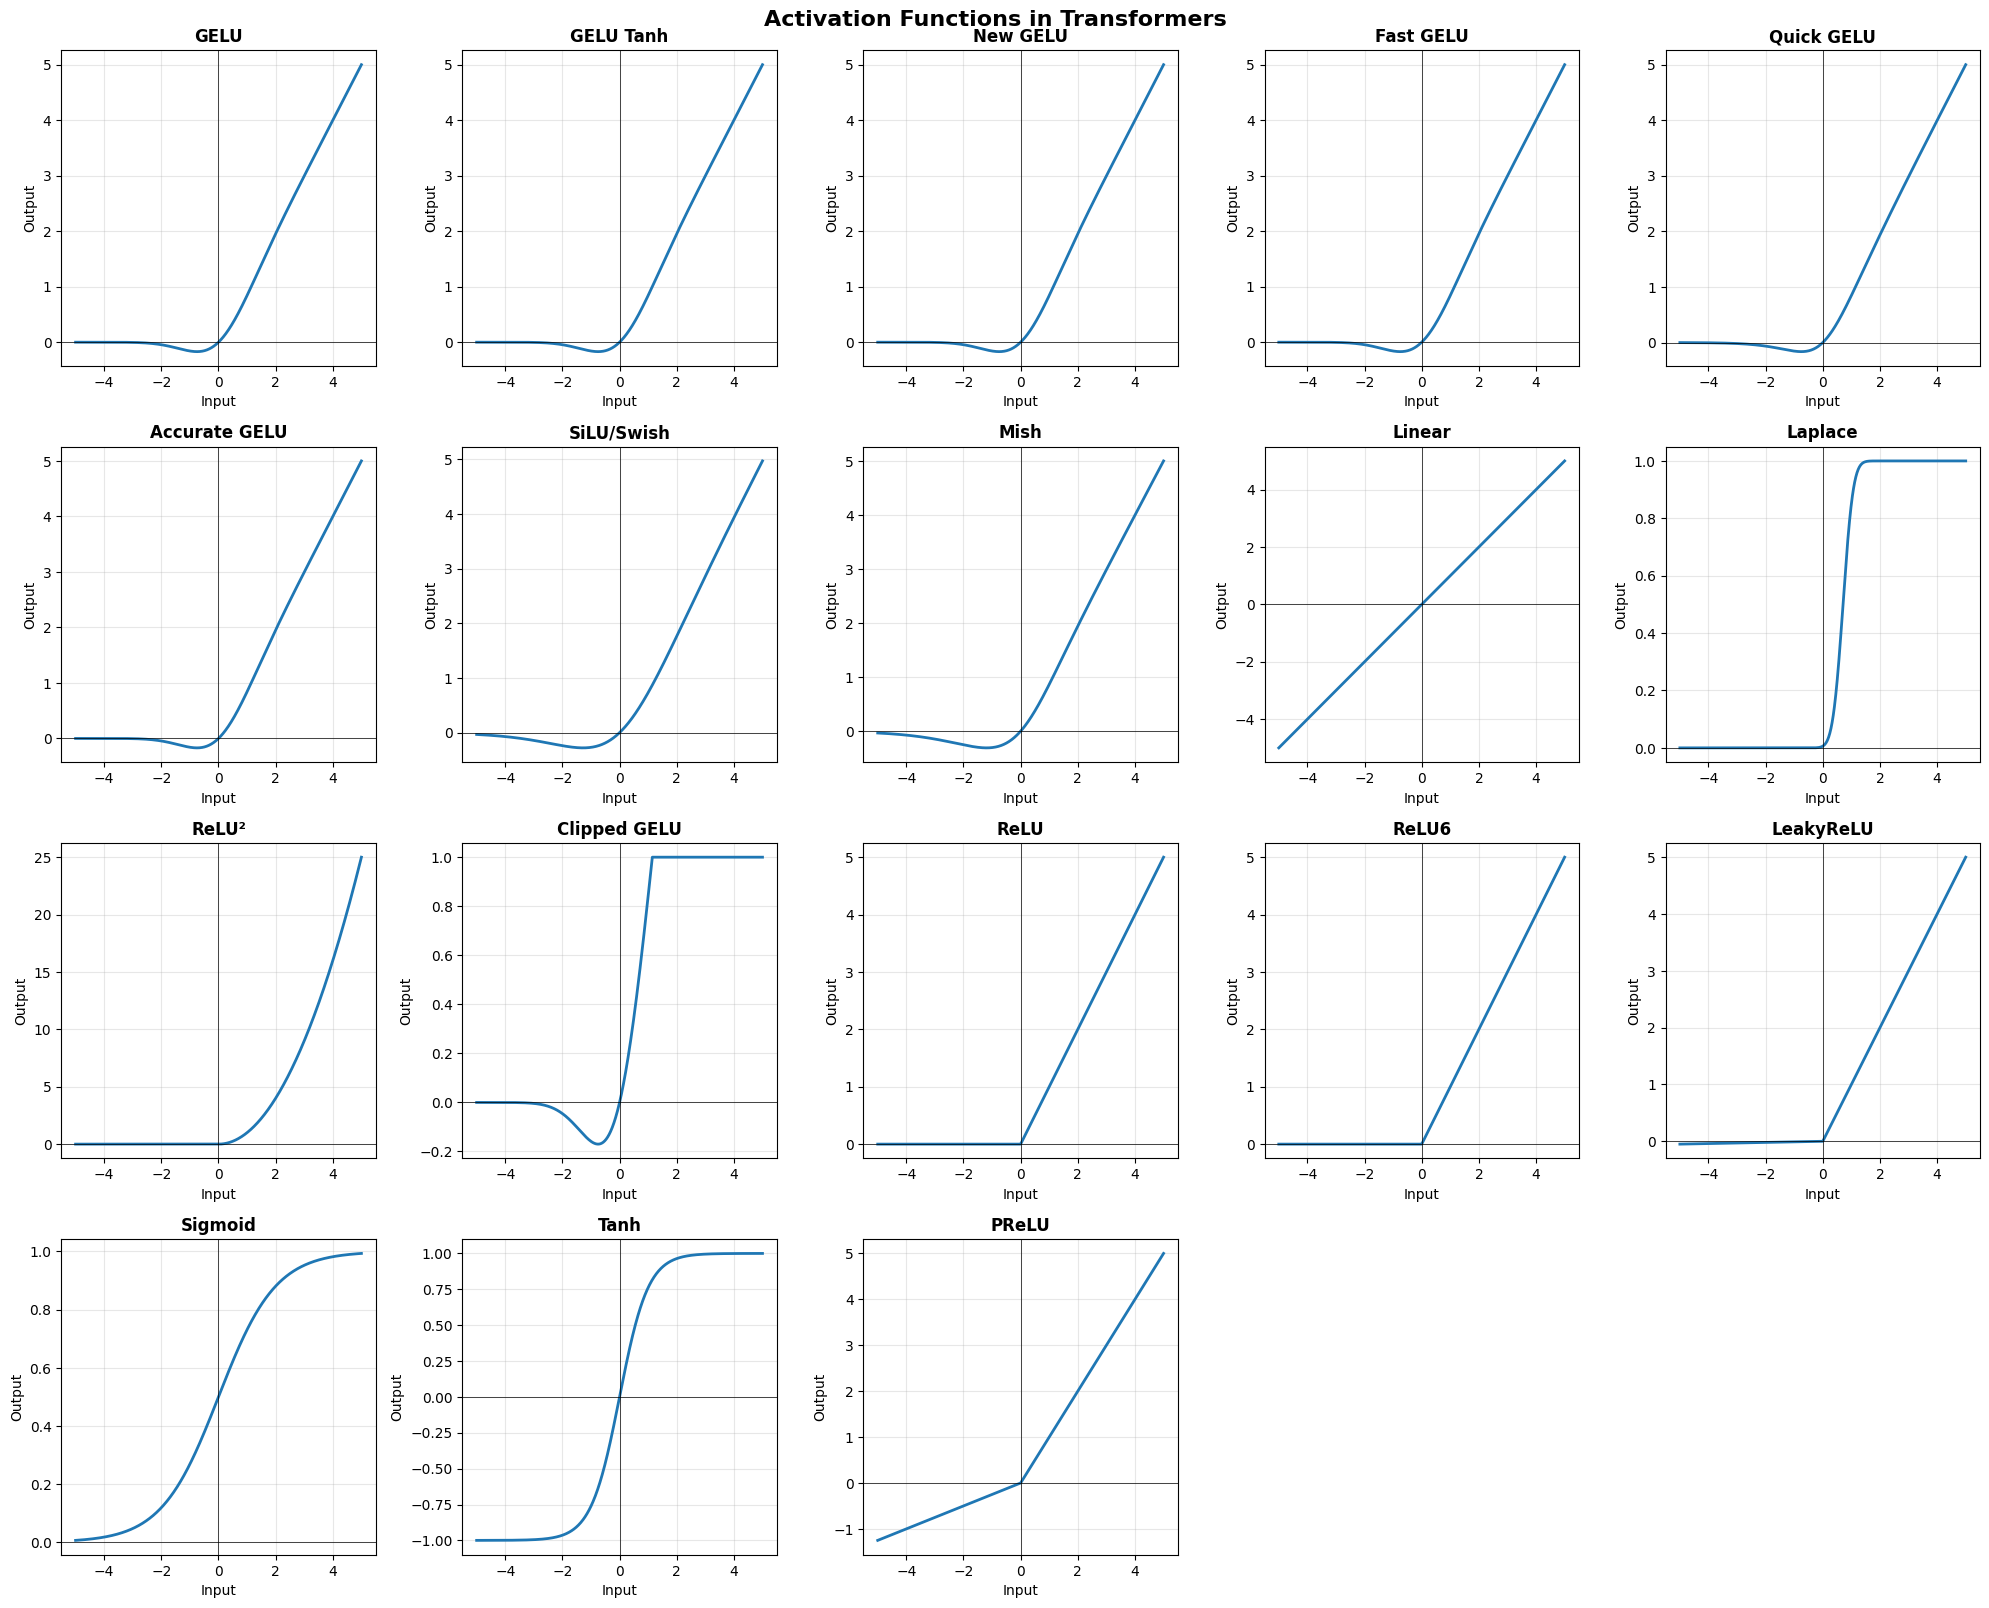

In [ ]:
fig, axes = plt.subplots(4, 5, figsize=(20, 16))
axes = axes.flatten()

for idx, (name, activation) in enumerate(activations.items()):
    with torch.no_grad():
        y = activation(x)
    
    axes[idx].plot(x.numpy(), y.numpy(), linewidth=2)
    axes[idx].set_title(name, fontsize=12, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)
    axes[idx].axhline(y=0, color='k', linewidth=0.5)
    axes[idx].axvline(x=0, color='k', linewidth=0.5)
    axes[idx].set_xlabel('Input')
    axes[idx].set_ylabel('Output')

for idx in range(len(activations), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.suptitle('Activation Functions in Transformers', fontsize=16, fontweight='bold', y=1.002)
plt.savefig('activation_functions_visualization.png', dpi=400, bbox_inches='tight')
plt.show()

print(f"Visualization saved as 'activation_functions_visualization.png'")
print(f"Total activation functions plotted: {len(activations)}")